In [479]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [480]:
df=pd.read_csv('/Users/macos/Downloads/metadata_tsv_2021_12_19/metadata.tsv', sep='\t',header=0, on_bad_lines='skip')

/Users/macos/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [481]:
df_new=df['Location'].str.split("/", expand=True)

In [482]:
countries=df_new[1]

In [483]:
df = df[['Submission date']]

In [484]:
continent=df_new[0]

In [485]:
df=df.sort_values(by='Submission date')
df= df.reset_index(drop=True)

In [486]:
df['Submission date'] = pd.to_datetime(df['Submission date'], format='%Y-%m-%d', errors='coerce')

In [487]:
df['Month'] = df['Submission date'].dt.strftime('%m-%y')

In [488]:
df["region"]=continent

In [489]:
df.region = df.region.str.replace(' ', '')

In [490]:
df1=df
df_new=df
df_new["Country"]=countries

In [491]:
df_new

,Submission date,Month,region,Country
0,2020-01-10,01-20,Europe,Bulgaria
1,2020-01-10,01-20,Europe,Bulgaria
2,2020-01-11,01-20,Europe,Bulgaria
3,2020-01-11,01-20,Europe,Bulgaria
4,2020-01-11,01-20,Europe,United Kingdom
...,...,...,...,...
6246646,2021-12-18,12-21,Europe,United Kingdom
6246647,2021-12-18,12-21,Europe,United Kingdom
6246648,2021-12-18,12-21,Europe,Sweden
6246649,2021-12-18,12-21,Europe,United Kingdom


In [492]:
df_new.Country = df_new.Country.str.replace(' ', '')

In [494]:
df_new.Country.value_counts()

USA               1958671
UnitedKingdom     1504435
Germany            308516
Denmark            259387
Canada             225860
                   ...   
SintEustatius           4
England                 3
Vanuatu                 2
Palau                   2
SlovakRepublic          1
Name: Country, Length: 208, dtype: int64

In [496]:
df_new.Country.value_counts().reset_index().to_csv('value_counts.csv')

In [497]:
df_Asia = df[df['region'] == "Asia"]
df_Oceania = df[df['region'] == "Oceania"]
df_NA = df[df['region'] == "NorthAmerica"]
df_Europe = df[df['region'] == "Europe"]
df_Africa = df[df['region'] == "Africa"]
df_SA = df[df['region'] == "SouthAmerica"]

In [498]:
df["region"]=df["region"].astype("string")

In [499]:
df.dtypes

Submission date    datetime64[ns]
Month                      object
region                     string
Country                    object
dtype: object

In [502]:
df["index"]=df.index

In [503]:
df_Asia= df_Asia.reset_index(drop=True)
df_Asia["index"]=df_Asia.index
df_Oceania=df_Oceania.reset_index(drop=True)
df_Oceania["index"]=df_Oceania.index
df_NA=df_NA.reset_index(drop=True)
df_NA["index"]=df_NA.index
df_Europe=df_Europe.reset_index(drop=True)
df_Europe["index"]=df_Europe.index
df_Africa=df_Africa.reset_index(drop=True)
df_Africa["index"]=df_Africa.index
df_SA=df_SA.reset_index(drop=True)
df_SA["index"]=df_SA.index

In [504]:
df_Asia

,Submission date,Month,region,Country,index
0,2020-03-06,03-20,Asia,Malaysia,0
1,2020-03-06,03-20,Asia,Malaysia,1
2,2020-03-07,03-20,Asia,Malaysia,2
3,2020-03-07,03-20,Asia,Malaysia,3
4,2020-03-07,03-20,Asia,Malaysia,4
...,...,...,...,...,...
421994,2021-12-18,12-21,Asia,India,421994
421995,2021-12-18,12-21,Asia,India,421995
421996,2021-12-18,12-21,Asia,India,421996
421997,2021-12-18,12-21,Asia,India,421997


In [505]:
print(df['Month'].nunique())
print(df_Asia['Month'].nunique())
print(df_Oceania['Month'].nunique())
print(df_NA['Month'].nunique())
print(df_SA['Month'].nunique())
print(df_Europe['Month'].nunique())
print(df_Africa['Month'].nunique())

24
22
23
24
23
24
22


In [506]:
df=df.drop_duplicates(subset='Submission date', keep="last")
df_Asia=df_Asia.drop_duplicates(subset='Submission date', keep="last")
df_Europe=df_Europe.drop_duplicates(subset='Submission date', keep="last")
df_Africa=df_Africa.drop_duplicates(subset='Submission date', keep="last")
df_NA=df_NA.drop_duplicates(subset='Submission date', keep="last")
df_SA=df_SA.drop_duplicates(subset='Submission date', keep="last")
df_Oceania=df_Oceania.drop_duplicates(subset='Submission date', keep="last")

In [507]:
df_Asia

,Submission date,Month,region,Country,index
1,2020-03-06,03-20,Asia,Malaysia,1
5,2020-03-07,03-20,Asia,Malaysia,5
6,2020-03-08,03-20,Asia,Malaysia,6
9,2020-03-09,03-20,Asia,Malaysia,9
17,2020-03-13,03-20,Asia,Japan,17
...,...,...,...,...,...
409372,2021-12-14,12-21,Asia,Japan,409372
413698,2021-12-15,12-21,Asia,India,413698
417354,2021-12-16,12-21,Asia,India,417354
421456,2021-12-17,12-21,Asia,Indonesia,421456


In [508]:
df['daily']=df['index'].diff()
df['daily'].fillna(df.iloc[0]['index'], inplace=True)
df_Asia['daily']=df_Asia['index'].diff()
df_Asia['daily'].fillna(df_Asia.iloc[0]['index'], inplace=True)
df_Europe['daily']=df_Europe['index'].diff()
df_Europe['daily'].fillna(df_Europe.iloc[0]['index'], inplace=True)
df_Africa['daily']=df_Africa['index'].diff()
df_Africa['daily'].fillna(df_Africa.iloc[0]['index'], inplace=True)
df_NA['daily']=df_NA['index'].diff()
df_NA['daily'].fillna(df_NA.iloc[0]['index'], inplace=True)
df_SA['daily']=df_SA['index'].diff()
df_SA['daily'].fillna(df_SA.iloc[0]['index'], inplace=True)
df_Oceania['daily']=df_Oceania['index'].diff()
df_Oceania['daily'].fillna(df_Oceania.iloc[0]['index'], inplace=True)

/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_3849/4093198121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['daily']=df['index'].diff()
/Users/macos/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_3849/4093198121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [509]:
df_Asia1=df_Asia.drop_duplicates(subset='Month', keep="last")
df_Europe1=df_Europe.drop_duplicates(subset='Month', keep="last")
df_Africa1=df_Africa.drop_duplicates(subset='Month', keep="last")
df_NA1=df_NA.drop_duplicates(subset='Month', keep="last")
df_SA1=df_SA.drop_duplicates(subset='Month', keep="last")
df_Oceania1=df_Oceania.drop_duplicates(subset='Month', keep="last")

In [510]:
df_NA1.to_csv('NA1.csv')
df_SA1.to_csv('SA1.csv')

In [511]:
df_Africa1.to_csv('Africa1.csv')

In [512]:
df_Africa1=pd.read_csv('Africa1.csv',index_col=0)

In [513]:
df_SA1=pd.read_csv('SA1.csv')

In [514]:
# df_Africa1

In [515]:
df_Africa1["Month"] = df_Africa1["Month"].astype(str)
df_SA1["Month"] = df_SA1["Month"].astype(str)

In [528]:
df_Africa

,Submission date,Month,region,Country,index,daily
0,2020-03-26,03-20,Africa,Zambia,1,0.0
4,2020-04-06,04-20,Africa,Niger,4,4.0
5,2020-04-09,04-20,Africa,Morocco,5,1.0
25,2020-04-12,04-20,Africa,Madagascar,25,20.0
69,2020-04-13,04-20,Africa,Madagascar,69,44.0
...,...,...,...,...,...,...
61169,2021-12-14,12-21,Africa,Reunion,61169,208.0
61357,2021-12-15,12-21,Africa,Madagascar,61357,188.0
61632,2021-12-16,12-21,Africa,SouthAfrica,61632,275.0
62360,2021-12-17,12-21,Africa,Gambia,62360,728.0


In [526]:
df_Africa.loc[0,"index"]=1

In [520]:
df_NA.drop(index=df_NA.index[0], 
        axis=0, 
        inplace=True)
# df_Africa.drop(index=df_Africa.index[0], 
#         axis=0, 
#         inplace=True)
df_SA.drop(index=df_SA.index[0], 
        axis=0, 
        inplace=True)
# df_Oceania.drop(index=df_Oceania.index[0], 
#         axis=0, 
#         inplace=True)

In [521]:
df_NA.iloc[0]["index"]

1

# Figure 1(d)

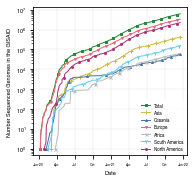

In [531]:
from scipy.interpolate import interpolate
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Helvetica"
plt.rc('ytick', labelsize=5.5) 
plt.rc('xtick', labelsize=3.5) 
plt.rc('axes', titlesize=5.5)
plt.rc('axes', labelsize=5.5)
my_xticks = ['Jan-20','Feb-20','Mar-20','Apr-20','May-20','Jun-20','Jul-20','Aug-20','Sep-20','Oct-20','Nov-20','Dec-20',
             'Jan-21','Feb-21','Mar-21','Apr-21','May-21','Jun-21','Jul-21','Aug-21','Sep-21','Oct-21','Nov-21','Dec-21']
# a_BSpline = interpolate.make_interp_spline(df['Month'],  df.index)
# y= a_BSpline(df['Month'])
# a_BSpline = interpolate.make_interp_spline(df_Oceania['Month'],  df_Oceania.index)
# y_Oceania= a_BSpline(df_Oceania['Submission date'])
plt.plot(df['Submission date'], df.index,color="#228833",marker='s',markersize=2, linewidth=1.0,markevery=40)
plt.plot(df_Asia['Submission date'], df_Asia['index'],color="#CCBB44",marker='+', markersize=4, linewidth=1.0,markevery=40)
plt.plot(df_Oceania['Submission date'], df_Oceania["index"], color="#4477AA",marker='^',markersize=2, linewidth=1.0,markevery=40)
plt.plot(df_Europe['Submission date'], df_Europe.index, color="#EE6677",marker='v' ,markersize=2, linewidth=1.0,markevery=40)
plt.plot(df_Africa['Submission date'], df_Africa["index"], color="#BBBBBB",marker= "x",markersize=3, linewidth=1.0 ,markevery=40)
plt.plot(df_SA['Submission date'], df_SA.index, color="#66CCEE",marker="1",markersize=4, linewidth=1.0,markevery=40)
plt.plot(df_NA['Submission date'], df_NA.index, color="#AA3377",marker="o",markersize=2, linewidth=1.0,markevery=40)
#plt.xticks(df_NA['Submission date'], my_xticks)

# # plt.set_xlabels(my_xticks)
# labels=["Total","Asia","Oceania","Europe","Africa","South America","North America"]
# leg = plt.legend()
plt.legend(labels,loc="lower right", prop={'size': 4.5},edgecolor="white")

leg.get_frame().set_edgecolor('white')
plt.yscale('log') 
plt.xlabel("Date")
positions = ('2020-01','2020-04','2020-07','2020-10','2021-01','2021-04','2021-07','2021-10','2022-01'
            
            )
labels1 = ('Jan-20','Apr','Jul','Oct','Jan-21','Apr','Jul','Oct','Jan-22')
plt.xticks(positions, labels1)
plt.tick_params(axis='x',pad=3)
#plt.ylim(1,9000000)
plt.ylabel("Number Sequenced Genomes in the GISAID")
plt.tight_layout()
plt.grid(linewidth=0.3,color="#DDDDDD")
#plt.show()
plt.gcf().set_size_inches(2.40157, 2.40157)
plt.savefig("1d.png",dpi=300,bbox_inches='tight')
# plt.savefig("1d.pdf",dpi=300,bbox_inches='tight')

In [533]:
# from scipy.interpolate import interpolate
# import matplotlib.pyplot as plt
# plt.rcParams["font.family"] = "Helvetica"
# plt.rc('ytick', labelsize=5.5) 
# plt.rc('xtick', labelsize=4) 
# plt.rc('axes', titlesize=5.5)
# plt.rc('axes', labelsize=5.5)
# my_xticks = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
# #a_BSpline = interpolate.make_interp_spline(df['date_submitted'],  df.index)
# #y= a_BSpline(df['date_submitted'])
# #a_BSpline = interpolate.make_interp_spline(df_Oceania['date_submitted'],  df_Oceania.index)
# #y_Oceania= a_BSpline(df_Oceania['date_submitted'])
# plt.plot(df['date_submitted'], df.index,color="#228833",marker='s',markersize=2, linewidth=1.0,markevery=50)
# plt.plot(df_Asia['date_submitted'], df_Asia['index'],color="#CCBB44",marker='+',markersize=4, linewidth=1.0,markevery=40)
# plt.plot(df_Oceania['date_submitted'], df_Oceania.index, color="#4477AA",marker='^',markersize=2, linewidth=1.0,markevery=20)
# plt.plot(df_Europe['date_submitted'], df_Europe.index, color="#EE6677",marker='v' ,markersize=2, linewidth=1.0,markevery=40)
# plt.plot(df_Africa['date_submitted'], df_Africa.index, color="#BBBBBB",marker= "X",mew=2,markersize=2, linewidth=1.0 ,markevery=20)
# plt.plot(df_SA['date_submitted'], df_SA.index, color="#66CCEE",marker="D",markersize=2, linewidth=1.0,markevery=20)
# plt.plot(df_NA['date_submitted'], df_NA.index, color="#AA3377",marker="o",markersize=2, linewidth=1.0,markevery=40)
# # plt.xticks(df_NA['date_submitted'], my_xticks)
# plt.gcf().set_size_inches(2.416, 2.458)
# # plt.set_xlabels(my_xticks)
# labels=["Total","Asia","Oceania","Europe","Africa","South America","North America"]
# plt.legend(labels,loc="lower right", prop={'size': 4.5})
# plt.yscale('log') 
# plt.xlabel("Date")
# positions = ('2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10')
# labels1 = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct')
# plt.xticks(positions, labels1)
# plt.tick_params(axis='x',pad=3)
# # plt.ylim(1,200000)
# plt.ylabel("Number of SARS-CoV-2 genomes sequenced")
# plt.tight_layout()
# # plt.grid(color="#DDDDDD")
# # plt.show()
# plt.savefig("growth_over_time_by_division_log_labels.png",dpi=300)
# #plt.savefig("growth_over_time_by_division_log_labels.pdf",dpi=300)

In [377]:
# df

In [378]:
# df_Africa

# OPTIONAL MOVING AVERAGE STUFF

In [379]:
df['SMA_10'] = df.daily.rolling(20, min_periods=1).mean()
df_Asia['SMA_10'] = df_Asia.daily.rolling(20, min_periods=1).mean()
df_Africa['SMA_10'] = df_Africa.daily.rolling(20, min_periods=1).mean()
df_Europe['SMA_10'] = df_Europe.daily.rolling(20, min_periods=1).mean()
df_NA['SMA_10'] = df_NA.daily.rolling(20, min_periods=1).mean()
df_SA['SMA_10'] = df_SA.daily.rolling(20, min_periods=1).mean()
df_Oceania['SMA_10'] = df_Oceania.daily.rolling(20, min_periods=1).mean()

/home/vc/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/vc/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [380]:
df_Europe.to_csv('df_Europe.csv')

In [381]:
df_Africa.to_csv('df_Africa.csv')